In [23]:
# import all tools we need

# Regular Exploratory and Data analysis (EDA) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# model for scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv('/content/cancer_reg.csv')
df

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [5]:
df.isna().sum()

,0
avganncount,0
avgdeathsperyear,0
target_deathrate,0
incidencerate,0
medincome,0
popest2015,0
povertypercent,0
studypercap,0
binnedinc,0
medianage,0


In [6]:
df['pctsomecol18_24'].dtypes

dtype('float64')

In [7]:
df['pctsomecol18_24'].value_counts()

,count
pctsomecol18_24,
43.0,10
42.1,8
42.3,8
45.5,7
36.6,7
...,...
72.7,1
53.2,1
46.5,1


In [8]:
df['pctemployed16_over'].dtypes

dtype('float64')

In [9]:
df['pctemployed16_over'].value_counts()

,count
pctemployed16_over,
51.9,20
48.9,20
57.9,20
54.2,19
59.7,19
...,...
34.3,1
73.6,1
32.8,1


In [10]:
df['pctprivatecoveragealone'].dtypes

dtype('float64')

In [11]:
df['pctprivatecoveragealone'].value_counts()

,count
pctprivatecoveragealone,
53.0,16
53.8,14
50.6,14
51.7,14
49.6,14
...,...
24.5,1
71.1,1
24.4,1


In [12]:
# fill missing valu
df['pctsomecol18_24'] = df['pctsomecol18_24'].fillna(43)
df['pctemployed16_over'] = df['pctemployed16_over'].fillna(51)
df['pctprivatecoveragealone'] = df['pctprivatecoveragealone'].fillna(53)

In [13]:
df.isna().sum()

,0
avganncount,0
avgdeathsperyear,0
target_deathrate,0
incidencerate,0
medincome,0
popest2015,0
povertypercent,0
studypercap,0
binnedinc,0
medianage,0


In [14]:
 df['target_deathrate'].shape

(3047,)

In [15]:
df['birthrate'].shape

(3047,)

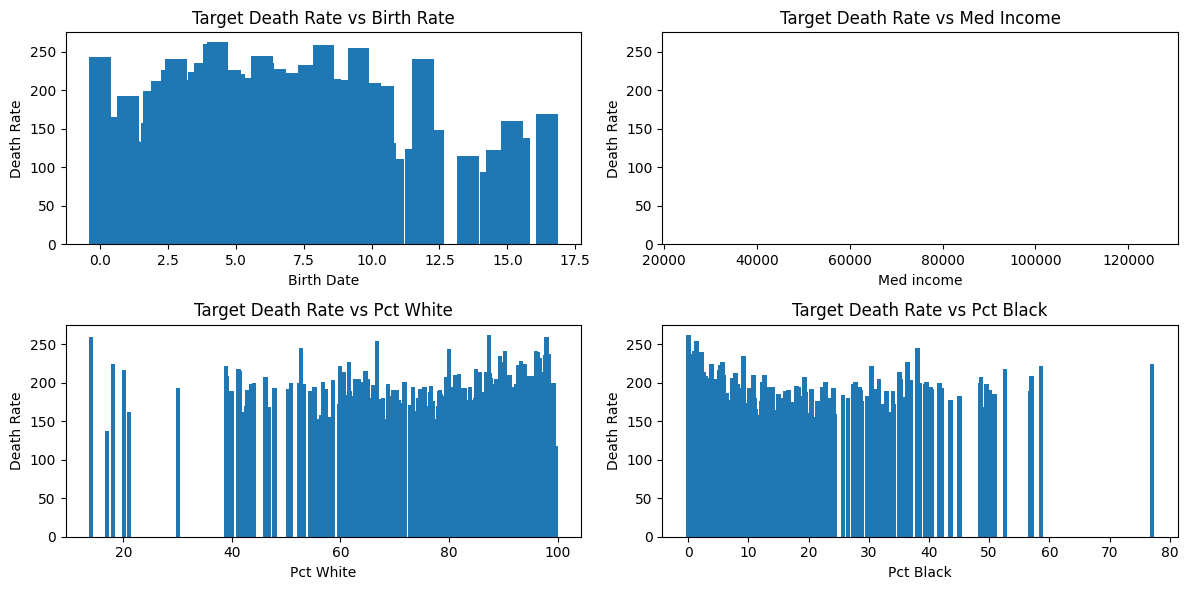

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(12, 6))


ax1.bar(df['birthrate'][:500], df['target_deathrate'][:500])
# Customize plot
ax1.set(title="Target Death Rate vs Birth Rate",
       xlabel="Birth Date",
       ylabel="Death Rate");

ax2.bar(df['medincome'][:500], df['target_deathrate'][:500])

# Customize plot
ax2.set(title="Target Death Rate vs Med Income",
       xlabel="Med income",
       ylabel="Death Rate");


ax3.bar(df['pctwhite'][:500], df['target_deathrate'][:500])
# Customize plot
ax3.set(title="Target Death Rate vs Pct White",
       xlabel="Pct White",
       ylabel="Death Rate");

ax4.bar(df['pctblack'][:500], df['target_deathrate'][:500])
# Customize plot
ax4.set(title="Target Death Rate vs Pct Black",
       xlabel="Pct Black",
       ylabel="Death Rate");

plt.tight_layout()
plt.show()

## Modelling

This is a regression dataset

In [17]:
# setup random seed
np.random.seed(42)

# Create X and y
X = df.drop('target_deathrate', axis=1)
y = df['target_deathrate']

# Split dataset into train and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'object' ]

one_hots = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

transformer = ColumnTransformer([('one_hots', one_hots, cat_cols)], remainder="passthrough")
transformer_X = transformer.fit_transform(X)
transformer_X

array([[ 0.        ,  0.        ,  0.        , ...,  1.84347853,
        52.85607588,  6.11883103],
       [ 0.        ,  0.        ,  0.        , ...,  3.74135153,
        45.37250044,  4.33309558],
       [ 0.        ,  0.        ,  0.        , ...,  2.74735831,
        54.44486837,  3.72948782],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  5.68070519,
        55.15394913,  7.80919168],
       [ 0.        ,  0.        ,  0.        , ...,  2.13179047,
        58.48423194,  7.58293839],
       [ 0.        ,  0.        ,  1.        , ...,  1.35645744,
        56.04024208,  8.98172324]])

In [19]:
# Split dataset into train and training set
X_train, X_test, y_train, y_test = train_test_split(transformer_X, y, test_size=0.2, random_state=42)

X_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.87913059,
        50.94954489,  6.32966083],
       [ 0.        ,  0.        ,  0.        , ...,  0.11861224,
        64.53215567,  5.14813016],
       [ 0.        ,  0.        ,  0.        , ...,  0.45061728,
        62.34448122,  5.62746201],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.65101497,
        47.7074118 ,  4.93728847],
       [ 0.        ,  0.        ,  0.        , ...,  0.14625229,
        62.43697479,  8.95196507],
       [ 0.        ,  0.        ,  0.        , ...,  0.40623555,
        47.20175728,  4.82368596]])

In [20]:
# Model dictionary

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.547301059195769

In [24]:
models = {
    "Random Forest" : RandomForestRegressor(),
    "Linear Regression": LinearRegression(),
    "xgboost": XGBRegressor(),
    "knn": KNeighborsRegressor(),
    "svr": SVR(),
    "Decision": DecisionTreeRegressor(),
    "ada": AdaBoostRegressor()
}

def model_and_score(X_train, X_test, y_train, y_test):
    # setup random seed
    np.random.seed(42)

    # create dict to keep model score
    model_score = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)

    return model_score

model_score = model_and_score(X_train, X_test, y_train, y_test)



In [26]:
model_score

{'Random Forest': 0.547301059195769,
 'Linear Regression': 0.49447190067877556,
 'xgboost': 0.5704229775987906,
 'knn': 0.14324319789429707,
 'svr': 0.07357463004843523,
 'Decision': 0.17831668450424443,
 'ada': 0.4460525344096471}

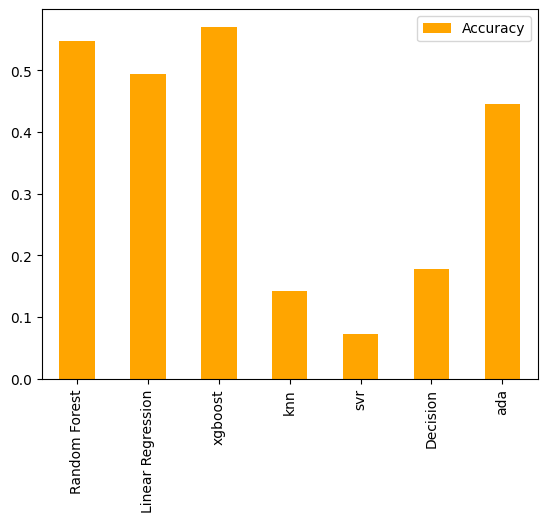

In [36]:
compare_models = pd.DataFrame(model_score, index=['Accuracy'])

compare_models.T.plot.bar(color="orange");

## Hyperparameter Tuning

In [41]:
# Hyperparameter tuning for randomforest regression
para_grid = {
     "n_estimators": np.arange(100, 1000, 50),
    "max_depth": [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

random_cv = RandomizedSearchCV(
  estimator=RandomForestRegressor(),
  param_distributions=para_grid,
  n_iter=10,
  cv=5,
  verbose=2
)

random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=650; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=650; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=650; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=650; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=650; total time=   1.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=550; total time=  46.6s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=550; total time=  47.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   verbose=2)

In [42]:
random_cv.best_params_

{'n_estimators': 450,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 20}

In [43]:
random_cv.score(X_test, y_test)

0.5518226161075277

In [45]:
y_pred = random_cv.predict(X_test)

In [46]:
score = r2_score(y_test, y_pred)
print(score)

0.5518226161075277


In [51]:
# calculate accuracy and score
def get_accuracy_and_score(y_test, y_pred):
  r2 = r2_score(y_test, y_pred)
  msr = mean_squared_error(y_test, y_pred)
  mar = mean_absolute_error(y_test, y_pred)

  print(f"R2 Accuracy score {r2*100:.2f}%")
  print(f"Mean Square Error {msr*1000:.2f}%")
  print(f"Mean Absolute Error {mar*100:.2f}%")


In [52]:
get_accuracy_and_score(y_test, y_pred)

R2 Accuracy score 55.18%
Mean Square Error 366719.03%
Mean Absolute Error 1403.35%
